<a href="https://colab.research.google.com/github/antonellagambarte/proyecto-final-CEIA/blob/main/modelos2_NHANES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [298]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

In [299]:
ruta_archivo_train = '/content/drive/My Drive/NHANES/dataset_train_imputado.csv'
ruta_archivo_test = '/content/drive/My Drive/NHANES/dataset_test_imputado.csv'


df_train = pd.read_csv(ruta_archivo_train)
df_test = pd.read_csv(ruta_archivo_test)


## **Explicación de las pruebas a realizar**

En principio se imputaron todas las variables que podrían servir para este proyecto. Esto se hizo con el fin de probar todos los modelos posibles  que permiten resolver el problema. Como el dataset ya tenía faltantes, sobre todo en lo que tiene que ver con los resultados de laboratorio, se podría haber aprovechado esto para hacer las pruebas por etapas, pero limita la cantidad de modelos a utilizar, ya que algunos no soportan faltantes. Según los resultados que se obtengan y los modelos que mejor funcionan, se podría realizar esta prueba o no.

Como primera etapa, se entrenarán los modelos con el dataset completo. Según los resultados obtenidos, se procederá a realizar las pruebas por etapas, es decir, entrenamiento con parte del dataset (datos básicos del paciente) y después con el dataset completo.

In [300]:
df_train.head()

,edad,genero,colesterol_total,hdl,trigliceridos,proteina_c,fam_cardio,fam_asma,fam_diabetes,hipertension,...,presion_sistolica_final,presion_diastolica_final,raza_origen_1,raza_origen_2,raza_origen_3,raza_origen_4,raza_origen_6,raza_origen_7,diabetes_2.0,diabetes_3.0
0,0.252775,1,0.836302,-0.748731,0.194624,0.547785,0,0,0,0,...,0.554321,0.310497,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.141000,0,0.540921,0.316824,1.469750,1.638509,0,1,0,1,...,-0.832083,0.030867,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.434103,1,-1.185449,0.695195,-0.746200,-0.095810,0,0,0,1,...,1.303890,0.310497,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.928552,1,-0.517855,-0.239514,0.121944,0.168128,0,0,1,0,...,-1.087660,-0.134685,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.366015,1,0.349781,0.447201,-0.747205,-0.982146,0,1,0,1,...,-0.213657,0.427966,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [301]:
df_test.head()

,edad,genero,colesterol_total,hdl,trigliceridos,proteina_c,fam_cardio,fam_asma,fam_diabetes,hipertension,...,presion_sistolica_final,presion_diastolica_final,raza_origen_1,raza_origen_2,raza_origen_3,raza_origen_4,raza_origen_6,raza_origen_7,diabetes_2.0,diabetes_3.0
0,-0.422269,1,-0.357335,-0.493765,0.271557,-0.209254,0,0,0,1,...,0.250529,0.836456,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-1.266074,0,-0.136862,0.754733,0.058258,-0.128435,0,0,0,0,...,-0.325419,-0.272991,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.491089,0,-2.062943,-0.576858,-1.405854,-0.304637,0,1,1,0,...,0.040209,-0.203157,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.096581,0,-1.828242,0.927919,-1.340363,-1.211241,0,1,0,1,...,-0.250708,0.030867,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.140268,0,0.276115,-0.661818,0.807326,-0.689028,0,0,0,1,...,0.387222,0.369723,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [302]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   colesterol_total                       4454 non-null   float64
 3   hdl                                    4454 non-null   float64
 4   trigliceridos                          4454 non-null   float64
 5   proteina_c                             4454 non-null   float64
 6   fam_cardio                             4454 non-null   int64  
 7   fam_asma                               4454 non-null   int64  
 8   fam_diabetes                           4454 non-null   int64  
 9   hipertension                           4454 non-null   int64  
 10  bmi                                    4454 non-null   float64
 11  fumo

In [303]:
# NIVEL 1: Datos de Primera Consulta (Anamnesis y Examen Físico Básico)
# Lo que el médico obtiene preguntando y pesando/midiendo al paciente.
# nivel_1_basico = [
#     'edad', 'genero', 'bmi', 'horas_suenio', 'anhedonia',
#     'fumador_actual', 'fumo_100_cigarrillos', 'consumo_alcohol_ultimo_año',
#     'consumo_excesivo_alcohol_ultimo_año', 'act_caminar_bici', 'act_moderada',
#     'act_vigorosa', 'realiza_actividad_intensidad_moderada',
#     'actividad_deportiva_moderada_x_semana', 'raza_origen_1', 'raza_origen_2',
#     'raza_origen_3', 'raza_origen_4', 'raza_origen_6', 'raza_origen_7'
# ]
nivel_1_basico = [
    'edad', 'genero', 'bmi', 'horas_suenio', 'anhedonia',
    'fumador_actual', 'consumo_alcohol_ultimo_año',
    'act_vigorosa', 'actividad_deportiva_moderada_x_semana', 'raza_origen_1', 'raza_origen_2',
    'raza_origen_3', 'raza_origen_4', 'raza_origen_6', 'raza_origen_7'
]

# NIVEL 2: Antecedentes y Signos Vitales (Diagnósticos previos y Presión)
# Datos que requieren una historia clínica o un tensiómetro.
nivel_2_antecedentes = [
    'fam_cardio', 'fam_asma', 'fam_diabetes', 'hipertension',
    'diabetes_2.0', 'diabetes_3.0', 'prediabetes_glucosa_alterada',
    'ACV', 'colesterol_alto', 'riñones_debiles_fallando',
    'presion_sistolica_final', 'presion_diastolica_final'
]

# NIVEL 3: Laboratorio Avanzado
# Resultados bioquímicos específicos.
nivel_3_laboratorio = [
    'colesterol_total', 'hdl', 'trigliceridos', 'proteina_c',
    'glicohemoglobina', 'hemoglobina', 'ancho_distribucion_globulos', 'creatinina'
]

# Unificamos todas para el entrenamiento inicial
features_totales = nivel_1_basico + nivel_2_antecedentes + nivel_3_laboratorio

In [304]:
df_train_temp = df_train.copy()
df_test_temp = df_test.copy()

columnas_eliminadas = ['raza_origen_7','act_caminar_bici','act_moderada','raza_origen_1','raza_origen_2',
                            'raza_origen_3','raza_origen_4', 'raza_origen_6','colesterol_alto',
                            'ancho_distribucion_globulos','fam_asma',
                       'glicohemoglobina','fumo_100_cigarrillos','realiza_actividad_intensidad_moderada','consumo_excesivo_alcohol_ultimo_año']

df_train_temp.drop(columns=columnas_eliminadas, inplace=True)
df_test_temp.drop(columns=columnas_eliminadas, inplace=True)

df_train_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   colesterol_total                       4454 non-null   float64
 3   hdl                                    4454 non-null   float64
 4   trigliceridos                          4454 non-null   float64
 5   proteina_c                             4454 non-null   float64
 6   fam_cardio                             4454 non-null   int64  
 7   fam_diabetes                           4454 non-null   int64  
 8   hipertension                           4454 non-null   int64  
 9   bmi                                    4454 non-null   float64
 10  fumador_actual                         4454 non-null   float64
 11  act_

In [305]:
TARGET = "alto_riesgo"

X_train = df_train_temp.drop(columns=[TARGET])
y_train = df_train_temp[TARGET]

X_test = df_test_temp.drop(columns=[TARGET])
y_test = df_test_temp[TARGET]


In [306]:
from sklearn.metrics import (
    roc_auc_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluar_overfitting(
    modelo,
    X_train, y_train,
    X_test, y_test,
    threshold=0.25,
    nombre="Modelo"
):

    # Probabilidades
    prob_train = modelo.predict_proba(X_train)[:, 1]
    prob_test = modelo.predict_proba(X_test)[:, 1]

    # Predicciones binarias
    pred_train = (prob_train >= threshold).astype(int)
    pred_test = (prob_test >= threshold).astype(int)

    # Métricas train
    auc_train = roc_auc_score(y_train, prob_train)
    recall_train = recall_score(y_train, pred_train)
    precision_train = precision_score(y_train, pred_train)
    f1_train = f1_score(y_train, pred_train)

    # Métricas test
    auc_test = roc_auc_score(y_test, prob_test)
    recall_test = recall_score(y_test, pred_test)
    precision_test = precision_score(y_test, pred_test)
    f1_test = f1_score(y_test, pred_test)

    print(f"\n===== {nombre} =====")
    print("---- TRAIN ----")
    print(f"AUC: {auc_train:.4f}")
    print(f"Recall: {recall_train:.4f}")
    print(f"Precision: {precision_train:.4f}")
    print(f"F1: {f1_train:.4f}")

    print("\n---- TEST ----")
    print(f"AUC: {auc_test:.4f}")
    print(f"Recall: {recall_test:.4f}")
    print(f"Precision: {precision_test:.4f}")
    print(f"F1: {f1_test:.4f}")

    auc_gap = auc_train - auc_test
    print(f"\n---- GAP (Train-Test) ----")
    print(f"AUC gap: {auc_gap:.4f}")

    # Matriz de confusión para el conjunto de prueba
    cm = confusion_matrix(y_test, pred_test)
    labels = ["Bajo riesgo", "Alto riesgo"]

    # Normalizar la matriz de confusión para mostrar porcentajes
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6,5))
    sns.heatmap(
        cm_normalized,
        annot=True,
        fmt=".2%", # Formato de porcentaje con 2 decimales
        cmap="Blues",
        xticklabels=labels,
        yticklabels=labels
    )
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusión Normalizada - {nombre} (TEST)")
    plt.show()

    return {
        "auc_train": auc_train,
        "recall_train": recall_train,
        "precision_train": precision_train,
        "f1_train": f1_train,
        "auc_test": auc_test,
        "recall_test": recall_test,
        "precision_test": precision_test,
        "f1_test": f1_test,
        "auc_gap": auc_gap
    }


In [307]:
# Inicializamos la lista para almacenar los resultados de los modelos
results = []

Antes SMOTE:
alto_riesgo
0    4032
1     422
Name: count, dtype: int64

Después SMOTE:
alto_riesgo
0    4032
1    2016
Name: count, dtype: int64

===== Random Forest + SMOTE =====
---- TRAIN ----
AUC: 0.9284
Recall: 0.9211
Precision: 0.6488
F1: 0.7614

---- TEST ----
AUC: 0.8296
Recall: 0.7810
Precision: 0.2350
F1: 0.3612

---- GAP (Train-Test) ----
AUC gap: 0.0988


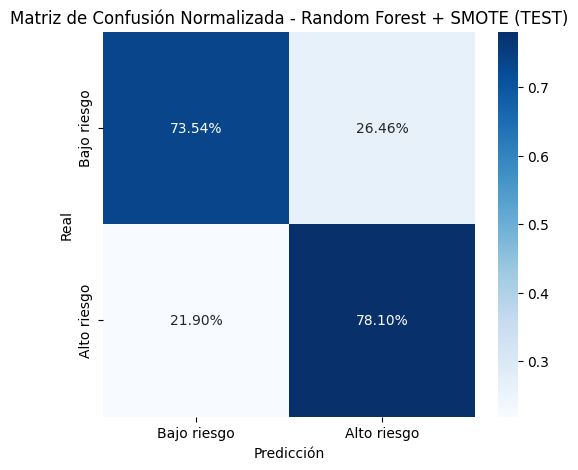


Métricas de Random Forest + SMOTE capturadas: {'auc_train': np.float64(0.92839169087774), 'recall_train': 0.9211309523809523, 'precision_train': 0.6488469601677149, 'f1_train': 0.7613776137761378, 'auc_test': np.float64(0.8296238614375383), 'recall_test': 0.780952380952381, 'precision_test': 0.2349570200573066, 'f1_test': 0.36123348017621143, 'auc_gap': np.float64(0.09876782944020168)}


In [308]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Oversampling
smote = SMOTE(
   sampling_strategy=0.5,
    random_state=42,
    k_neighbors=3
)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Antes SMOTE:")
print(y_train.value_counts())

print("\nDespués SMOTE:")
print(y_train_sm.value_counts())


# Modelo
modelo_smote = RandomForestClassifier(
    max_depth=5,
    n_estimators=100,
    random_state=42
)

modelo_smote.fit(X_train_sm, y_train_sm)

# Capturamos las métricas devueltas por la función modificada
rf_smote_metrics = evaluar_overfitting(
    modelo_smote,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.3,
    nombre="Random Forest + SMOTE"
)

# Opcional: imprimir las métricas capturadas para esta celda
print("\nMétricas de Random Forest + SMOTE capturadas:", rf_smote_metrics)
results.append({"Modelo": "Random Forest + SMOTE", **rf_smote_metrics})


===== XGBoost =====
---- TRAIN ----
AUC: 0.9238
Recall: 0.9638
Precision: 0.5637
F1: 0.7113

---- TEST ----
AUC: 0.8211
Recall: 0.8762
Precision: 0.1925
F1: 0.3156

---- GAP (Train-Test) ----
AUC gap: 0.1028


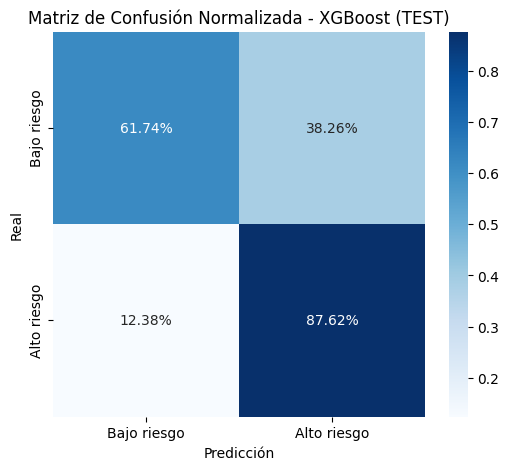

In [309]:
from xgboost import XGBClassifier

# ratio clases para penalización
ratio = (y_train == 0).sum() / (y_train == 1).sum() #9.55

modelo_xgb = XGBClassifier(
    n_estimators=200,
    max_depth=2,
    learning_rate=0.03,
    subsample=0.6,
    colsample_bytree=0.8,
    min_child_weight=2,
    scale_pos_weight=2,
    eval_metric="auc",
    random_state=42
)

modelo_xgb.fit(X_train_sm, y_train_sm)

# Se capturan las métricas
xgb_metrics = evaluar_overfitting(
    modelo_xgb,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.3,
    nombre="XGBoost"
)

results.append({"Modelo": "XGBoost", **xgb_metrics})


===== CatBoost =====
---- TRAIN ----
AUC: 0.9724
Recall: 0.9965
Precision: 0.5888
F1: 0.7402

---- TEST ----
AUC: 0.8181
Recall: 0.8667
Precision: 0.1978
F1: 0.3221

---- GAP (Train-Test) ----
AUC gap: 0.1543


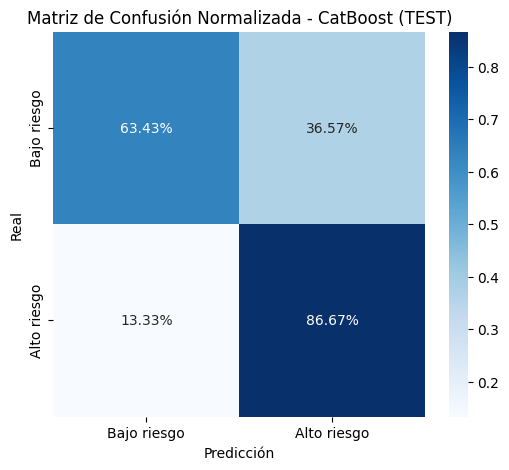

In [310]:
!pip install catboost
from catboost import CatBoostClassifier

ratio = (y_train == 0).sum() / (y_train == 1).sum()

modelo_cat = CatBoostClassifier(
    iterations=500,
    depth=3,
    learning_rate=0.05,
    loss_function='Logloss',
    scale_pos_weight=ratio,
    verbose=0,
    random_state=42
)

modelo_cat.fit(X_train_sm, y_train_sm)

# Se capturan las métricas
cat_metrics = evaluar_overfitting(
    modelo_cat,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.4,
    nombre="CatBoost"
)

results.append({"Modelo": "CatBoost", **cat_metrics})


===== Balanced RF =====
---- TRAIN ----
AUC: 0.9982
Recall: 1.0000
Precision: 0.3320
F1: 0.4985

---- TEST ----
AUC: 0.8383
Recall: 0.7810
Precision: 0.2462
F1: 0.3744

---- GAP (Train-Test) ----
AUC gap: 0.1599


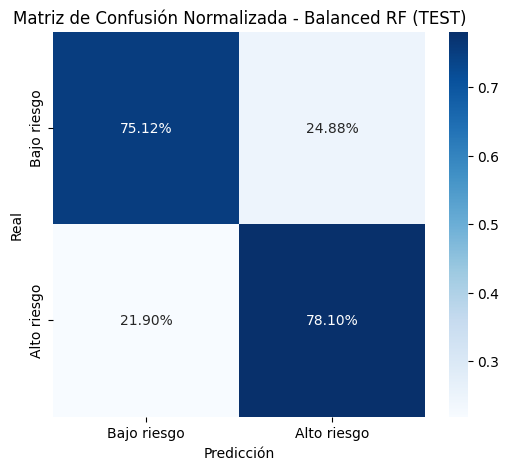

In [311]:
from imblearn.ensemble import BalancedRandomForestClassifier

modelo_brf = BalancedRandomForestClassifier(
    n_estimators=400,
    random_state=42
)

modelo_brf.fit(X_train, y_train)

# Se capturan las métricas
brf_metrics = evaluar_overfitting(
    modelo_brf,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Balanced RF"
)

results.append({"Modelo": "Balanced Random Forest", **brf_metrics})



===== Logistic Regression =====
---- TRAIN ----
AUC: 0.8837
Recall: 0.8863
Precision: 0.2513
F1: 0.3916

---- TEST ----
AUC: 0.8630
Recall: 0.8667
Precision: 0.2420
F1: 0.3784

---- GAP (Train-Test) ----
AUC gap: 0.0207


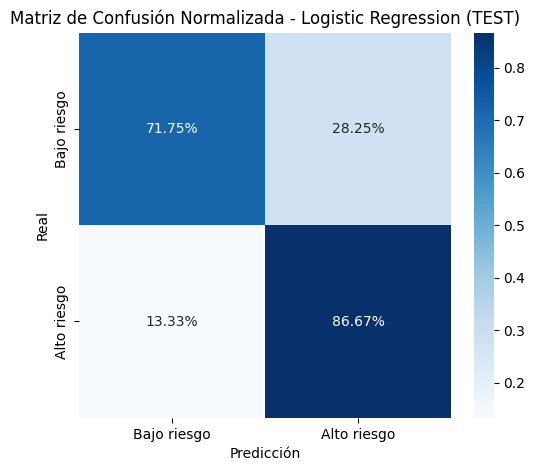

In [312]:
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(
    class_weight='balanced',
    max_iter=2000
)

modelo_lr.fit(X_train, y_train)

# Se capturan las métricas
lr_metrics = evaluar_overfitting(
    modelo_lr,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Logistic Regression"
)

results.append({"Modelo": "Logistic Regression", **lr_metrics})


===== Decision Tree Classifier =====
---- TRAIN ----
AUC: 0.8880
Recall: 0.9645
Precision: 0.2218
F1: 0.3607

---- TEST ----
AUC: 0.7706
Recall: 0.8190
Precision: 0.1799
F1: 0.2950

---- GAP (Train-Test) ----
AUC gap: 0.1174


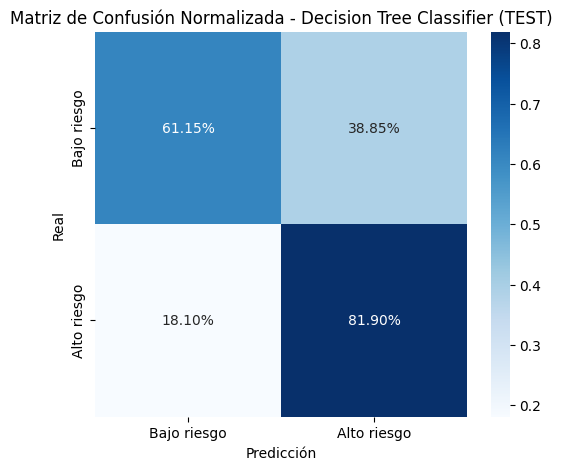

In [313]:
from sklearn.tree import DecisionTreeClassifier

modelo_dt = DecisionTreeClassifier(
    max_depth=5,
    random_state=42,
    class_weight='balanced'
)

modelo_dt.fit(X_train, y_train)

# Se capturan las métricas
dt_metrics = evaluar_overfitting(
    modelo_dt,
    X_train, y_train,
    X_test, y_test,
    threshold=0.3,
    nombre="Decision Tree Classifier"
)

# Se agregan las métricas al DataFrame de resultados
results.append({"Modelo": "Decision Tree Classifier", **dt_metrics})


===== SVM Linear Kernel =====
---- TRAIN ----
AUC: 0.8830
Recall: 0.3720
Precision: 0.4435
F1: 0.4046

---- TEST ----
AUC: 0.8627
Recall: 0.3524
Precision: 0.4684
F1: 0.4022

---- GAP (Train-Test) ----
AUC gap: 0.0203


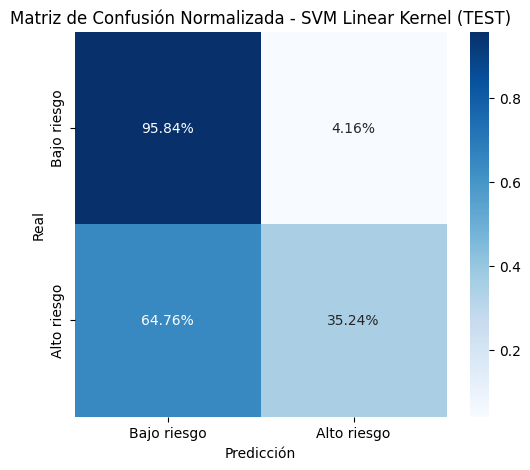

In [314]:
from sklearn.svm import SVC

modelo_svm = SVC(
    kernel='linear',
    probability=True,
    random_state=42,
    class_weight='balanced'
)

modelo_svm.fit(X_train, y_train)

# Se capturan las métricas
svm_metrics = evaluar_overfitting(
    modelo_svm,
    X_train, y_train,
    X_test, y_test,
    threshold=0.3,
    nombre="SVM Linear Kernel"
)

# Se agregan las métricas al DataFrame de resultados
results.append({"Modelo": "SVM Linear Kernel", **svm_metrics})


In [315]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   1114 non-null   float64
 1   genero                                 1114 non-null   int64  
 2   colesterol_total                       1114 non-null   float64
 3   hdl                                    1114 non-null   float64
 4   trigliceridos                          1114 non-null   float64
 5   proteina_c                             1114 non-null   float64
 6   fam_cardio                             1114 non-null   int64  
 7   fam_diabetes                           1114 non-null   int64  
 8   hipertension                           1114 non-null   int64  
 9   bmi                                    1114 non-null   float64
 10  fumador_actual                         1114 non-null   float64
 11  act_

In [316]:
import pandas as pd

df_results = pd.DataFrame(results)

df_results

,Modelo,auc_train,recall_train,precision_train,f1_train,auc_test,recall_test,precision_test,f1_test,auc_gap
0,Random Forest + SMOTE,0.928392,0.921131,0.648847,0.761378,0.829624,0.780952,0.234957,0.361233,0.098768
1,XGBoost,0.923835,0.963790,0.563679,0.711331,0.821053,0.876190,0.192469,0.315609,0.102782
2,CatBoost,0.972442,0.996528,0.588804,0.740236,0.818094,0.866667,0.197826,0.322124,0.154348
3,Balanced Random Forest,0.998170,1.000000,0.332022,0.498523,0.838303,0.780952,0.246246,0.374429,0.159868
4,Logistic Regression,0.883745,0.886256,0.251344,0.391623,0.863042,0.866667,0.242021,0.378378,0.020702
5,Decision Tree Classifier,0.887990,0.964455,0.221798,0.360656,0.770607,0.819048,0.179916,0.295026,0.117382
6,SVM Linear Kernel,0.882999,0.372038,0.443503,0.404639,0.862731,0.352381,0.468354,0.402174,0.020268


In [317]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    modelo_lr,
    X_train,
    y_train,
    cv=5,
    scoring='roc_auc'
)

print(scores.mean(), scores.std())


0.8731161581510051 0.013364418495851158


## **GRÁFICOS**

In [318]:
pip install shap

In [319]:
import shap
print("SHAP library imported successfully.")

SHAP library imported successfully.


### **RAMDOM FOREST**

In [320]:
explainer_rf_smote = shap.TreeExplainer(modelo_smote, X_train_sm)
print("SHAP TreeExplainer for Random Forest + SMOTE initialized.")

SHAP TreeExplainer for Random Forest + SMOTE initialized.


In [321]:
shap_values_rf_smote = explainer_rf_smote.shap_values(X_test)
print("SHAP values for Random Forest + SMOTE calculated.")

 99%|===================| 2206/2228 [00:30<00:00]       

SHAP values for Random Forest + SMOTE calculated.


Shape of shap_values_rf_smote: (1114, 25, 2)
Shape of X_test: (1114, 25)


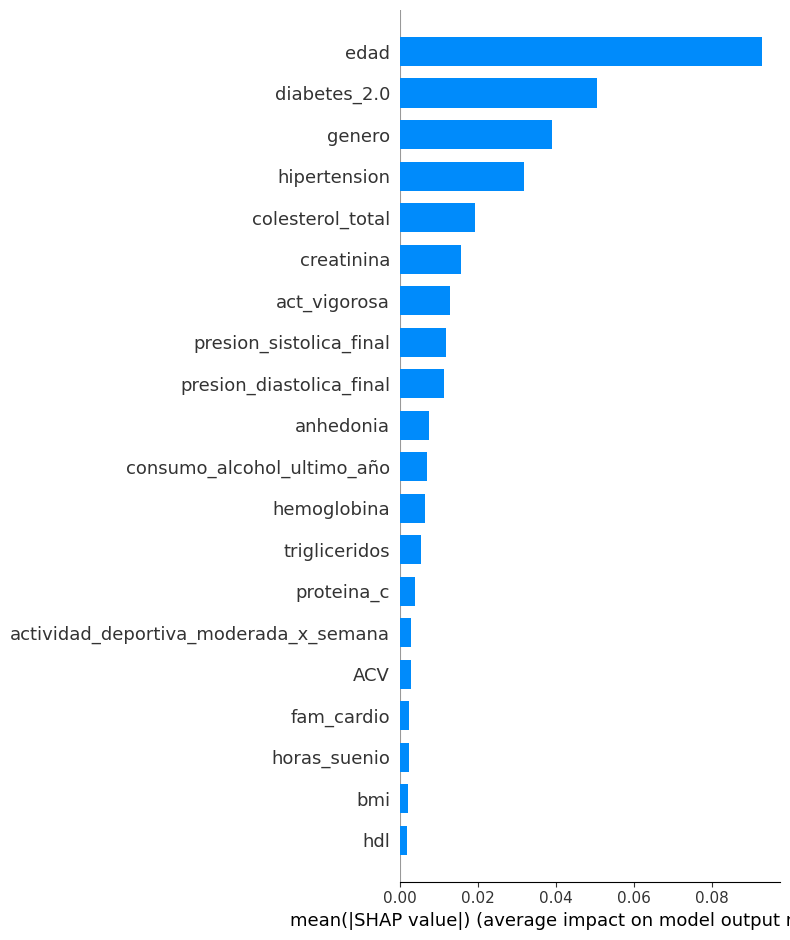

Global summary plot (bar type) for Random Forest + SMOTE generated.


In [322]:
print(f"Shape of shap_values_rf_smote: {shap_values_rf_smote.shape}")
print(f"Shape of X_test: {X_test.shape}")

# Correctly slice for the SHAP values of the positive class (index 1) across all samples and features
shap.summary_plot(shap_values_rf_smote[:, :, 1], X_test, plot_type="bar")
print("Global summary plot (bar type) for Random Forest + SMOTE generated.")

In [323]:
instance_to_explain_rf_smote = X_test.iloc[[0]]
shap_values_instance_rf_smote = explainer_rf_smote.shap_values(instance_to_explain_rf_smote)

print("Selected a specific instance from X_test for local explanation for Random Forest + SMOTE.")
print("SHAP values for the selected instance calculated.")

Selected a specific instance from X_test for local explanation for Random Forest + SMOTE.
SHAP values for the selected instance calculated.


In [324]:
shap.force_plot(explainer_rf_smote.expected_value[1], shap_values_instance_rf_smote[0, :, 1], instance_to_explain_rf_smote)
print("Local force plot for Random Forest + SMOTE generated.")

Local force plot for Random Forest + SMOTE generated.


### **CATBOOST**

In [325]:
explainer_cat = shap.TreeExplainer(modelo_cat, X_train_sm)
print("SHAP TreeExplainer for CatBoost initialized.")

SHAP TreeExplainer for CatBoost initialized.


In [326]:
shap_values_cat = explainer_cat.shap_values(X_test)
print("SHAP values for CatBoost calculated.")

 97%|=================== | 1082/1114 [00:21<00:00]       

SHAP values for CatBoost calculated.


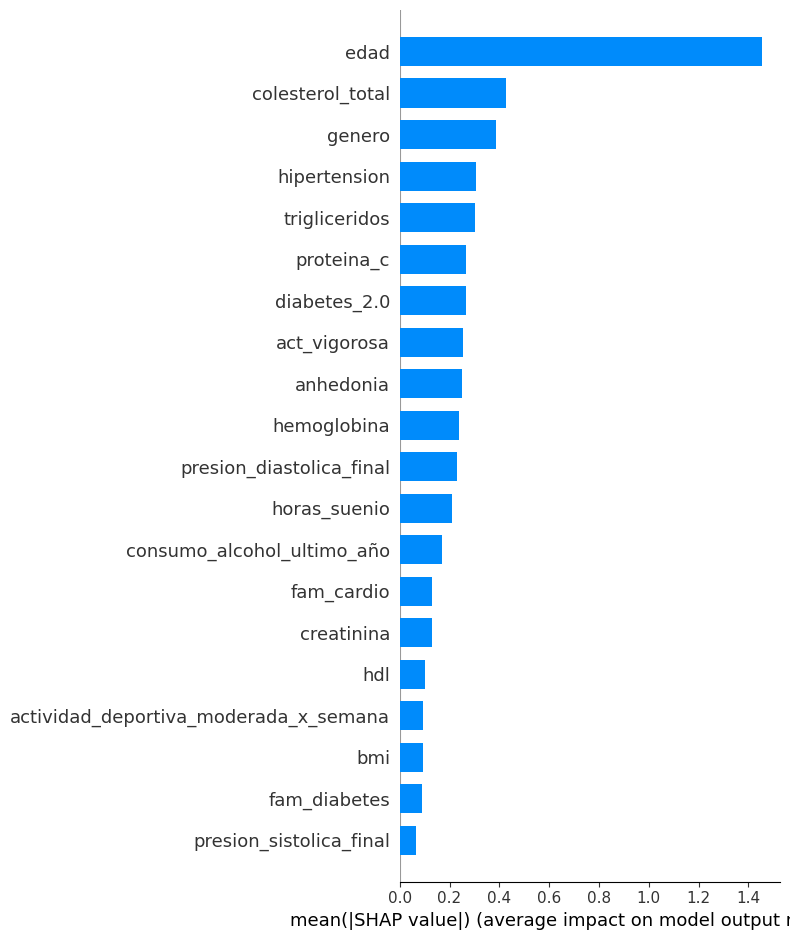

Global summary plot (bar type) for CatBoost generated.


In [327]:
shap.summary_plot(shap_values_cat, X_test, plot_type="bar")
print("Global summary plot (bar type) for CatBoost generated.")

In [328]:
instance_to_explain_cat = X_test.iloc[[0]]
shap_values_instance_cat = explainer_cat.shap_values(instance_to_explain_cat)

print("Selected a specific instance from X_test for local explanation for CatBoost.")
print("SHAP values for the selected instance calculated.")

Selected a specific instance from X_test for local explanation for CatBoost.
SHAP values for the selected instance calculated.


In [329]:
shap.force_plot(explainer_cat.expected_value, shap_values_instance_cat, instance_to_explain_cat)
print("Local force plot for CatBoost generated.")

Local force plot for CatBoost generated.


### **BALANCED RAMDOM FOREST**

In [330]:
explainer_brf = shap.TreeExplainer(modelo_brf, X_train)
print("SHAP TreeExplainer for Balanced Random Forest initialized.")

SHAP TreeExplainer for Balanced Random Forest initialized.


In [331]:
shap_values_brf = explainer_brf.shap_values(X_test)
print("SHAP values for Balanced Random Forest calculated.")

100%|===================| 2217/2228 [03:35<00:01]       

SHAP values for Balanced Random Forest calculated.


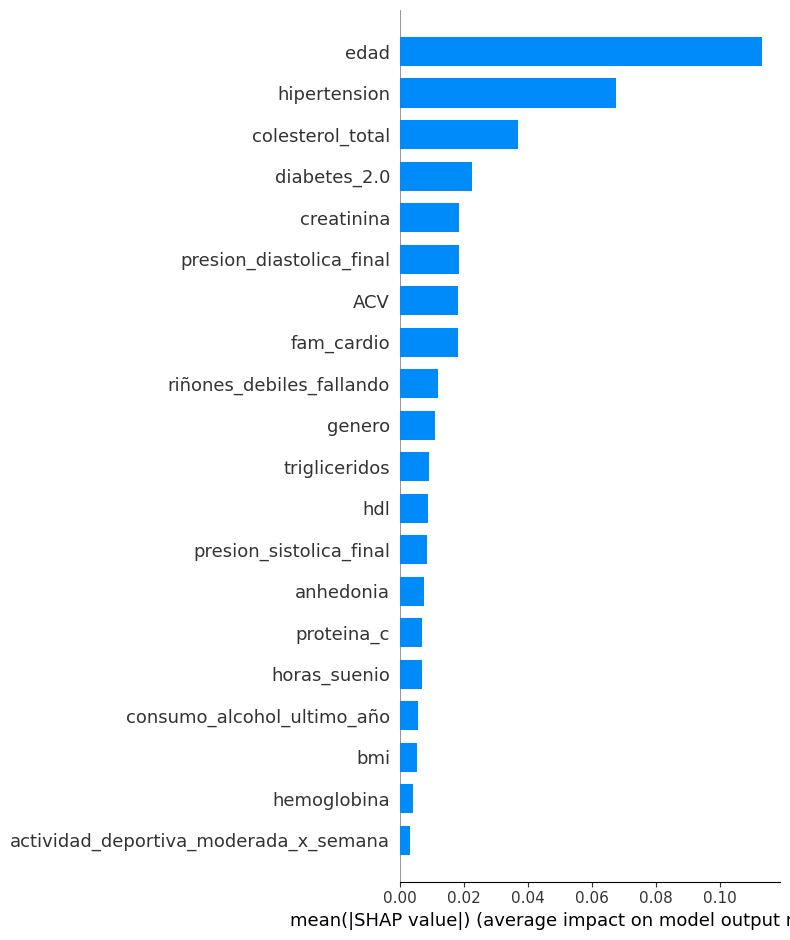

Global summary plot (bar type) for Balanced Random Forest generated.


In [332]:
shap.summary_plot(shap_values_brf[:, :, 1], X_test, plot_type="bar")
print("Global summary plot (bar type) for Balanced Random Forest generated.")

In [333]:
instance_to_explain_brf = X_test.iloc[[0]]
print("Selected a specific instance from X_test for local explanation for Balanced Random Forest.")

Selected a specific instance from X_test for local explanation for Balanced Random Forest.


In [334]:
shap_values_instance_brf = explainer_brf.shap_values(instance_to_explain_brf)
print("SHAP values for the selected instance calculated for Balanced Random Forest.")

SHAP values for the selected instance calculated for Balanced Random Forest.


In [335]:
shap.force_plot(explainer_brf.expected_value[1], shap_values_instance_brf[0, :, 1], instance_to_explain_brf)
print("Local force plot for Balanced Random Forest generated.")

Local force plot for Balanced Random Forest generated.


### **Decision Tree Classifier**

In [336]:
explainer_dt = shap.TreeExplainer(modelo_dt, X_train)
print("SHAP TreeExplainer for Decision Tree Classifier initialized.")

SHAP TreeExplainer for Decision Tree Classifier initialized.


In [337]:
shap_values_dt = explainer_dt.shap_values(X_test)
print("SHAP values for Decision Tree Classifier calculated.")

SHAP values for Decision Tree Classifier calculated.


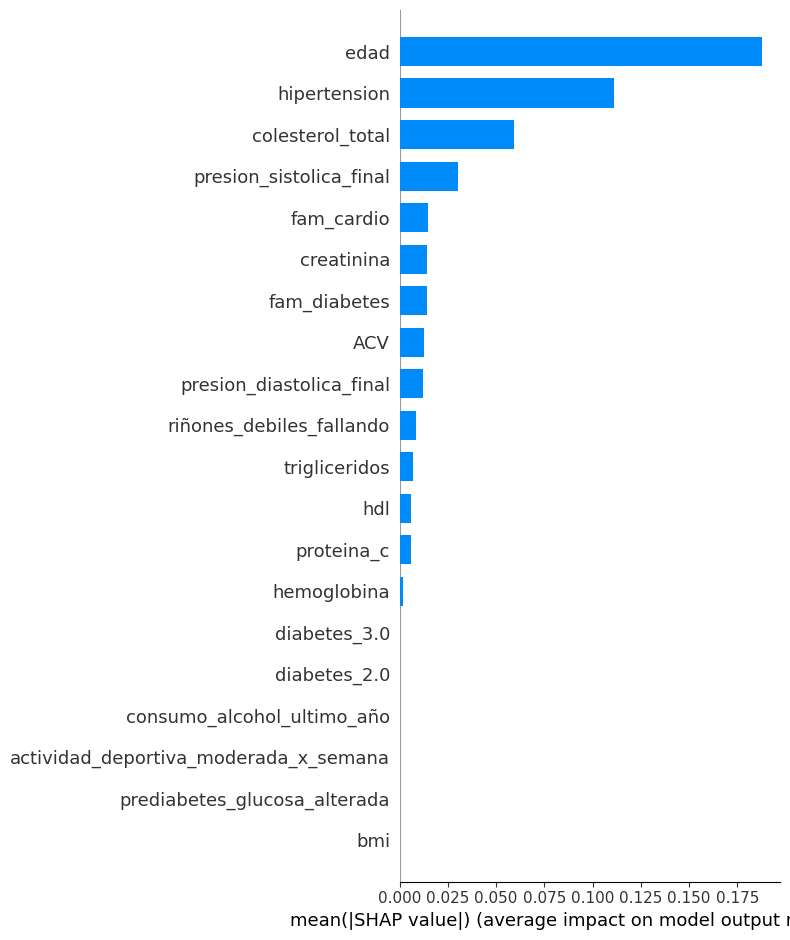

Global summary plot (bar type) for Decision Tree Classifier generated.


In [338]:
shap.summary_plot(shap_values_dt[:, :, 1], X_test, plot_type="bar")
print("Global summary plot (bar type) for Decision Tree Classifier generated.")

In [339]:
instance_to_explain_dt = X_test.iloc[[0]]
print("Selected a specific instance from X_test for local explanation for Decision Tree Classifier.")

Selected a specific instance from X_test for local explanation for Decision Tree Classifier.


In [340]:
shap_values_instance_dt = explainer_dt.shap_values(instance_to_explain_dt)
print("SHAP values for the selected instance calculated for Decision Tree Classifier.")

SHAP values for the selected instance calculated for Decision Tree Classifier.


In [341]:
shap.force_plot(explainer_dt.expected_value[1], shap_values_instance_dt[0, :, 1], instance_to_explain_dt)
print("Local force plot for Decision Tree Classifier generated.")

Local force plot for Decision Tree Classifier generated.


### **XGBoost**

In [342]:
import shap

explainer_xgb = shap.TreeExplainer(modelo_xgb, X_train_sm)
print("SHAP TreeExplainer para XGBoost inicializado (re-generado).")

SHAP TreeExplainer para XGBoost inicializado (re-generado).


In [343]:
shap_values_xgb = explainer_xgb.shap_values(X_test)
print("Valores SHAP para XGBoost calculados (re-generado).")

Valores SHAP para XGBoost calculados (re-generado).


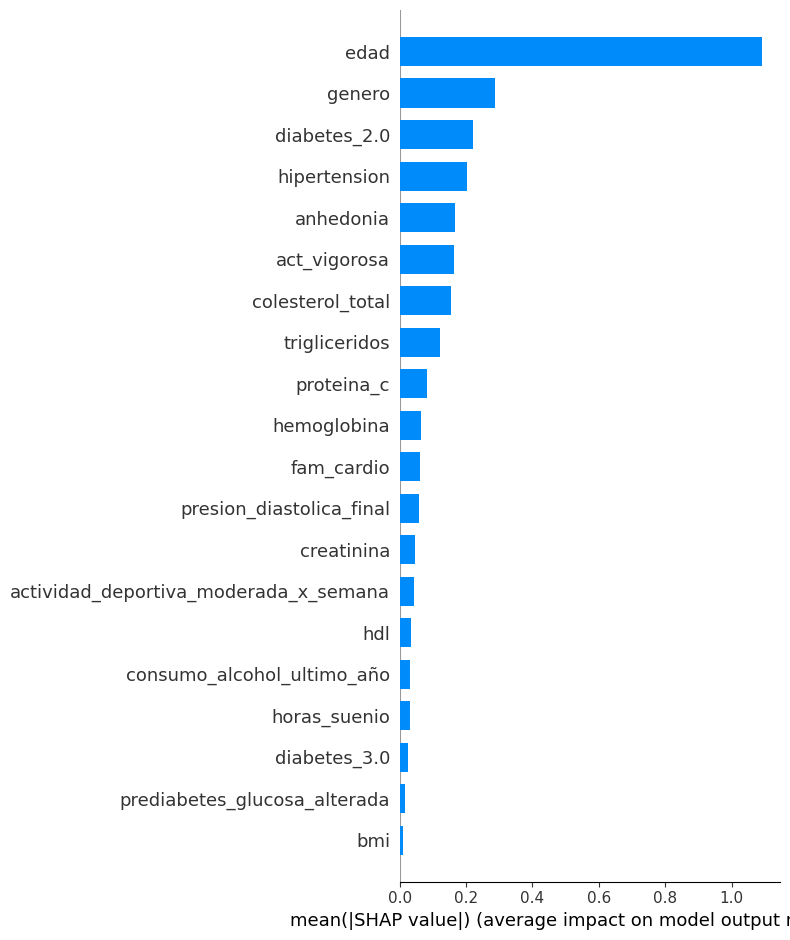

Gráfico de resumen global (barras) para XGBoost generado (re-generado).


In [344]:
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar")
print("Gráfico de resumen global (barras) para XGBoost generado (re-generado).")

In [345]:
instance_to_explain_xgb = X_test.iloc[[0]]
shap_values_instance_xgb = explainer_xgb.shap_values(instance_to_explain_xgb)

print("Instancia específica para explicación local de XGBoost seleccionada y valores SHAP calculados (re-generado).")

Instancia específica para explicación local de XGBoost seleccionada y valores SHAP calculados (re-generado).


In [346]:
shap.force_plot(explainer_xgb.expected_value, shap_values_instance_xgb, instance_to_explain_xgb)
print("Gráfico de fuerza local para XGBoost generado (re-generado).")

Gráfico de fuerza local para XGBoost generado (re-generado).


### **SVM Linear Kernel**

In [347]:
explainer_svm = shap.LinearExplainer(modelo_svm, X_train)
print("SHAP LinearExplainer for SVM Linear Kernel initialized.")

SHAP LinearExplainer for SVM Linear Kernel initialized.


In [348]:
shap_values_svm = explainer_svm.shap_values(X_test)
print("SHAP values for SVM Linear Kernel calculated.")

SHAP values for SVM Linear Kernel calculated.


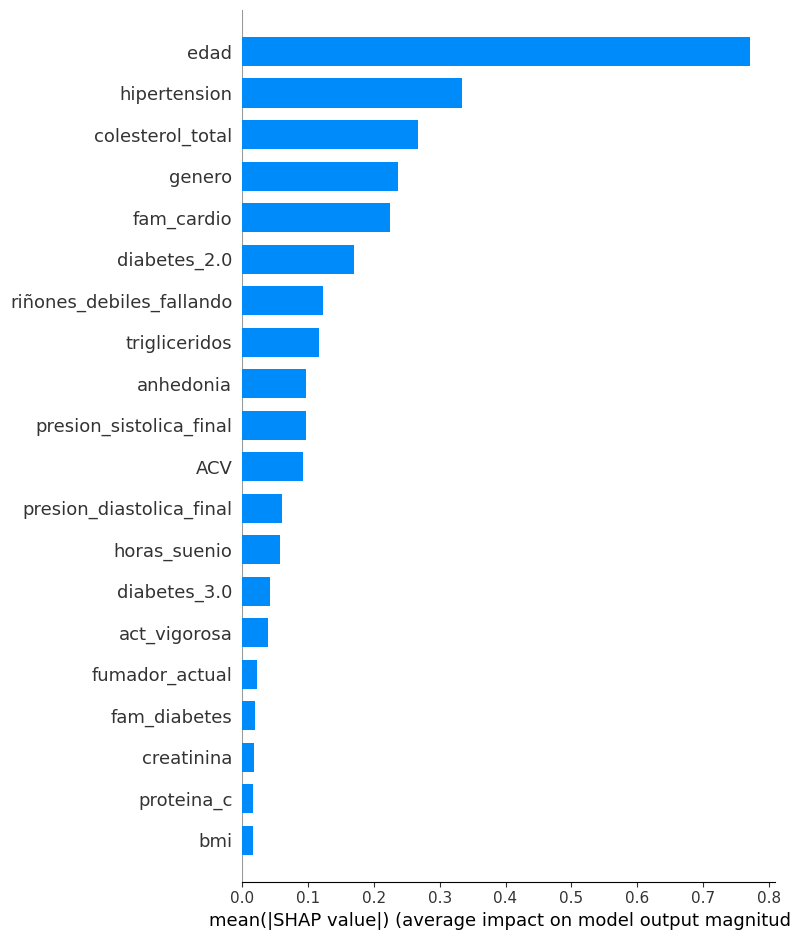

Global summary plot (bar type) for SVM Linear Kernel generated.


In [349]:
shap.summary_plot(shap_values_svm, X_test, plot_type="bar")
print("Global summary plot (bar type) for SVM Linear Kernel generated.")

In [350]:
instance_to_explain_lr = X_test.iloc[[0]]
print("Selected a specific instance from X_test for local explanation for SVM Linear Kernel.")

Selected a specific instance from X_test for local explanation for SVM Linear Kernel.


In [351]:
shap_values_instance_lr = explainer_svm.shap_values(instance_to_explain_lr)
print("SHAP values for the selected instance calculated for SVM Linear Kernel.")

SHAP values for the selected instance calculated for SVM Linear Kernel.


In [352]:
shap.force_plot(explainer_svm.expected_value, shap_values_instance_lr, instance_to_explain_lr)
print("Local force plot for SVM Linear Kernel generated.")

Local force plot for SVM Linear Kernel generated.


## **ETAPAS**

In [353]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   1114 non-null   float64
 1   genero                                 1114 non-null   int64  
 2   colesterol_total                       1114 non-null   float64
 3   hdl                                    1114 non-null   float64
 4   trigliceridos                          1114 non-null   float64
 5   proteina_c                             1114 non-null   float64
 6   fam_cardio                             1114 non-null   int64  
 7   fam_diabetes                           1114 non-null   int64  
 8   hipertension                           1114 non-null   int64  
 9   bmi                                    1114 non-null   float64
 10  fumador_actual                         1114 non-null   float64
 11  act_

In [354]:
nivel_1_basico = [
    'edad', 'genero', 'bmi', 'horas_suenio', 'anhedonia',
    'fumador_actual', 'consumo_alcohol_ultimo_año',
    'act_vigorosa', 'actividad_deportiva_moderada_x_semana']

# NIVEL 2: Antecedentes y Signos Vitales (Diagnósticos previos y Presión)
# Datos que requieren una historia clínica o un tensiómetro.
nivel_2_antecedentes = [
    'fam_cardio', 'fam_diabetes', 'hipertension',
    'diabetes_2.0', 'diabetes_3.0', 'prediabetes_glucosa_alterada',
    'ACV', 'riñones_debiles_fallando',
    'presion_sistolica_final', 'presion_diastolica_final'
]

# NIVEL 3: Laboratorio Avanzado
# Resultados bioquímicos específicos.
nivel_3_laboratorio = [
    'colesterol_total', 'hdl', 'trigliceridos', 'proteina_c', 'hemoglobina', 'creatinina'
]

# Unificamos todas para el entrenamiento inicial
features_totales = nivel_1_basico + nivel_2_antecedentes + nivel_3_laboratorio

In [355]:
nivel_1_cols = [c for c in nivel_1_basico if c in X_train.columns]
nivel_2_cols = nivel_1_cols + [c for c in nivel_2_antecedentes if c in X_train.columns]
nivel_3_cols = nivel_2_cols + [c for c in nivel_3_laboratorio if c in X_train.columns]

etapas = [nivel_2_cols, nivel_3_cols]
nombres_etapas = ["Etapa 1: Consulta Básica", "Etapa 2: + Antecedentes/Presión", "Etapa 3: + Laboratorio"]


 PROCESANDO: Etapa 1: Consulta Básica

===== Etapa 1: Consulta Básica =====
---- TRAIN ----
AUC: 0.9221
Recall: 0.9588
Precision: 0.5629
F1: 0.7094

---- TEST ----
AUC: 0.8172
Recall: 0.8667
Precision: 0.1928
F1: 0.3154

---- GAP (Train-Test) ----
AUC gap: 0.1049


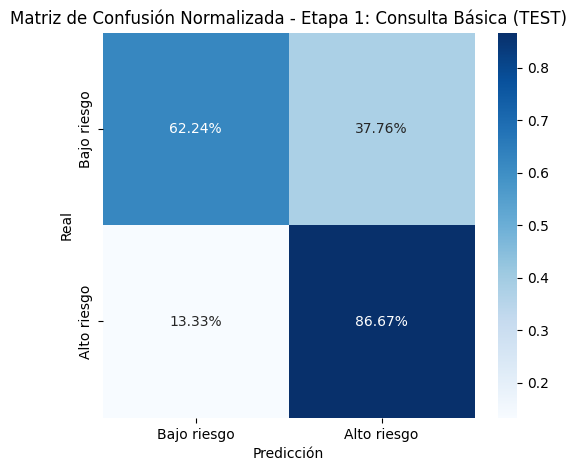


 PROCESANDO: Etapa 2: + Antecedentes/Presión

===== Etapa 2: + Antecedentes/Presión =====
---- TRAIN ----
AUC: 0.9241
Recall: 0.9638
Precision: 0.5656
F1: 0.7129

---- TEST ----
AUC: 0.8197
Recall: 0.8857
Precision: 0.1942
F1: 0.3185

---- GAP (Train-Test) ----
AUC gap: 0.1044


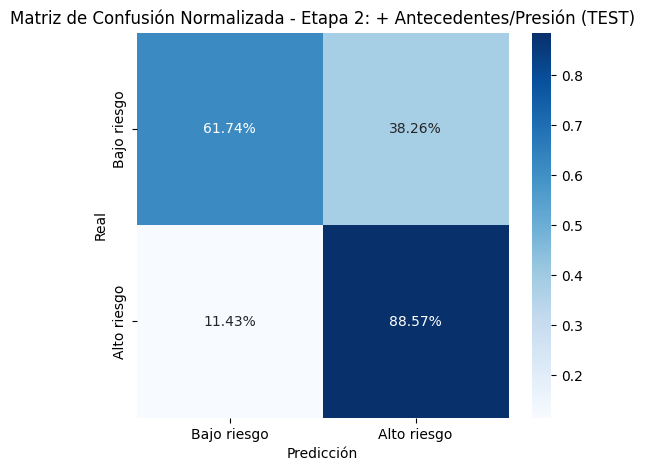

In [356]:
resultados_etapas = []

for i in range(len(etapas)):
    X_train_etapa = X_train_sm[etapas[i]]
    X_test_etapa = X_test[etapas[i]]

    modelo_etapa = XGBClassifier(
        n_estimators=200,
        max_depth=2,
        learning_rate=0.03,
        subsample=0.6,
        colsample_bytree=0.8,
        scale_pos_weight=2,
        eval_metric="auc",
        random_state=42
    )

    modelo_etapa.fit(X_train_etapa, y_train_sm)

    print(f"\n PROCESANDO: {nombres_etapas[i]}")
    metricas = evaluar_overfitting(
        modelo_etapa,
        X_train_etapa, y_train_sm,
        X_test_etapa, y_test,
        threshold=0.3,
        nombre=nombres_etapas[i]
    )

    resultados_etapas.append({"Etapa": nombres_etapas[i], **metricas})

# Convertimos a DataFrame para comparar
df_etapas = pd.DataFrame(resultados_etapas)

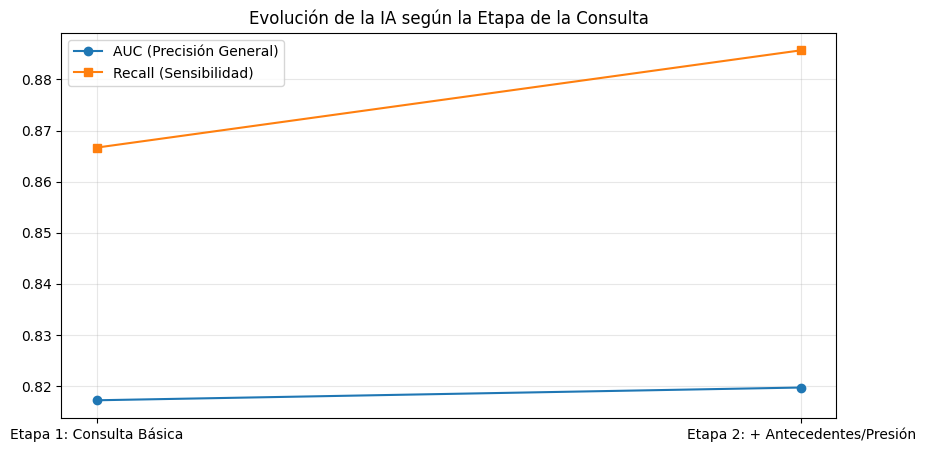

In [357]:
plt.figure(figsize=(10, 5))
plt.plot(df_etapas['Etapa'], df_etapas['auc_test'], marker='o', label='AUC (Precisión General)')
plt.plot(df_etapas['Etapa'], df_etapas['recall_test'], marker='s', label='Recall (Sensibilidad)')
plt.title('Evolución de la IA según la Etapa de la Consulta')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


🩺 EVALUANDO CON REGRESIÓN LOGÍSTICA: Etapa 1: Consulta Básica

===== LR - Etapa 1: Consulta Básica =====
---- TRAIN ----
AUC: 0.8806
Recall: 0.7842
Precision: 0.6794
F1: 0.7281

---- TEST ----
AUC: 0.8219
Recall: 0.7143
Precision: 0.2717
F1: 0.3937

---- GAP (Train-Test) ----
AUC gap: 0.0587


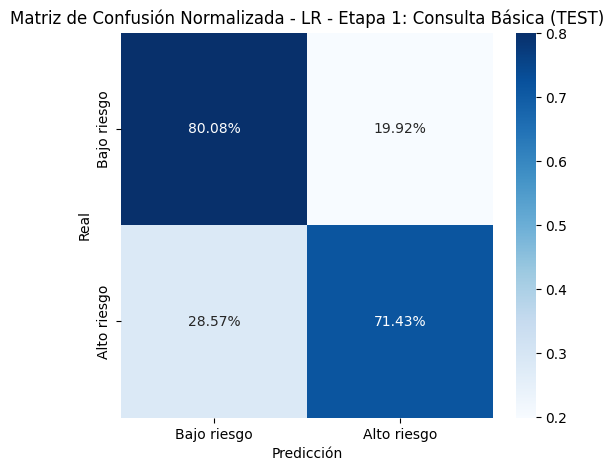


🩺 EVALUANDO CON REGRESIÓN LOGÍSTICA: Etapa 2: + Antecedentes/Presión

===== LR - Etapa 2: + Antecedentes/Presión =====
---- TRAIN ----
AUC: 0.8846
Recall: 0.7877
Precision: 0.6874
F1: 0.7342

---- TEST ----
AUC: 0.8272
Recall: 0.7143
Precision: 0.2747
F1: 0.3968

---- GAP (Train-Test) ----
AUC gap: 0.0574


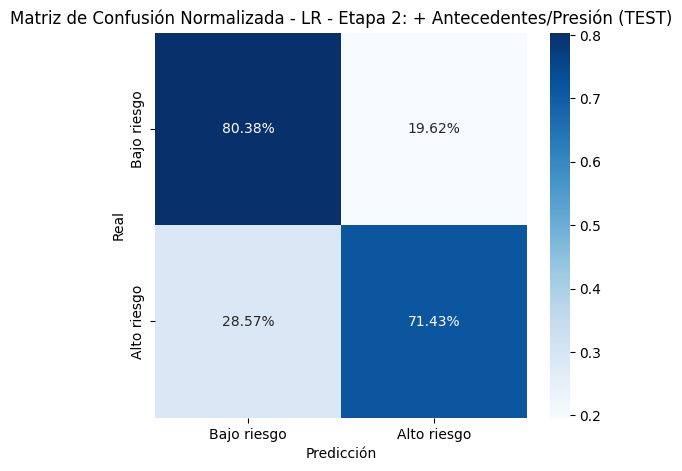


📊 RESUMEN FINAL POR ETAPAS (LOGISTIC REGRESSION):
                             Etapa  auc_test  recall_test  precision_test
0         Etapa 1: Consulta Básica  0.821908     0.714286        0.271739
1  Etapa 2: + Antecedentes/Presión  0.827241     0.714286        0.274725


In [359]:
from sklearn.linear_model import LogisticRegression

resultados_etapas_lr = []

# Bucle de entrenamiento por etapas usando Regresión Logística
for i in range(len(etapas)):
    # Se selecciona las columnas de la etapa actual
    X_train_etapa = X_train_sm[etapas[i]]
    X_test_etapa = X_test[etapas[i]]

    # Configuración la Regresión Logística
    # 'max_iter' alto para asegurar convergencia y 'class_weight=None'
    # porque ya balanceamos con SMOTE antes.
    modelo_etapa_lr = LogisticRegression(
        class_weight=None,
        max_iter=2000
    )

    modelo_etapa_lr.fit(X_train_etapa, y_train_sm)

    print(f"\n🩺 EVALUANDO CON REGRESIÓN LOGÍSTICA: {nombres_etapas[i]}")
    metricas = evaluar_overfitting(
        modelo_etapa_lr,
        X_train_etapa, y_train_sm,
        X_test_etapa, y_test,
        threshold=0.4,
        nombre=f"LR - {nombres_etapas[i]}"
    )

    resultados_etapas_lr.append({"Etapa": nombres_etapas[i], **metricas})


df_etapas_lr = pd.DataFrame(resultados_etapas_lr)

# Resumen final de precisión
print("\n📊 RESUMEN FINAL POR ETAPAS (LOGISTIC REGRESSION):")
print(df_etapas_lr[['Etapa', 'auc_test', 'recall_test', 'precision_test']])

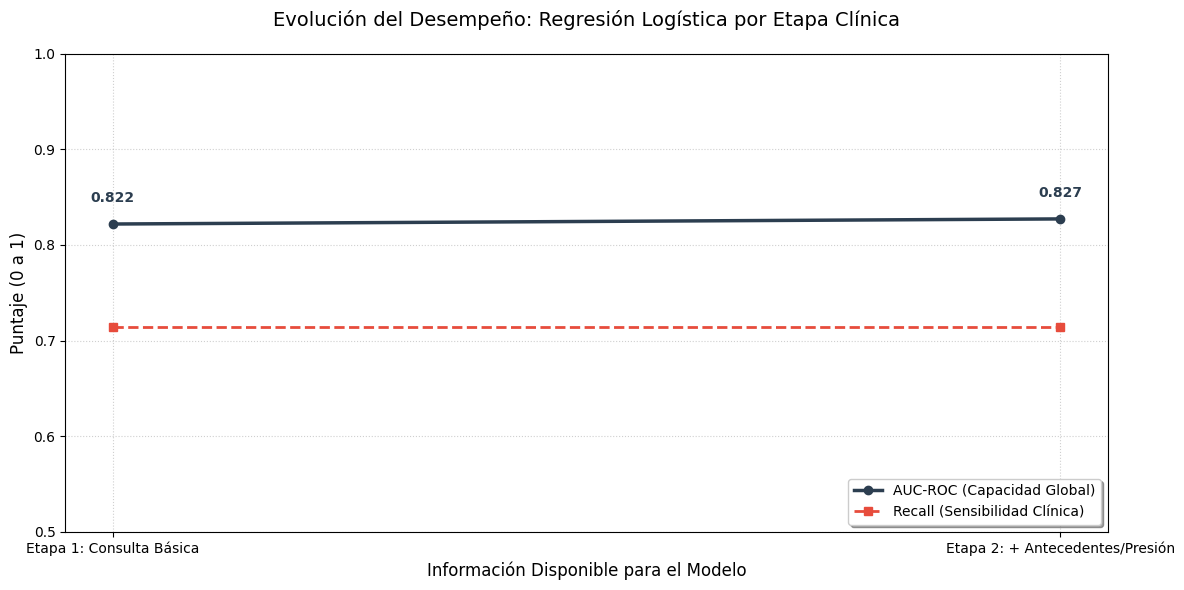

In [360]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(df_etapas_lr['Etapa'], df_etapas_lr['auc_test'],
         marker='o', linestyle='-', color='#2c3e50', linewidth=2.5, label='AUC-ROC (Capacidad Global)')

plt.plot(df_etapas_lr['Etapa'], df_etapas_lr['recall_test'],
         marker='s', linestyle='--', color='#e74c3c', linewidth=2, label='Recall (Sensibilidad Clínica)')

plt.title('Evolución del Desempeño: Regresión Logística por Etapa Clínica', fontsize=14, pad=20)
plt.ylabel('Puntaje (0 a 1)', fontsize=12)
plt.xlabel('Información Disponible para el Modelo', fontsize=12)
plt.ylim(0.5, 1.0)
plt.legend(loc='lower right', frameon=True, shadow=True)
plt.grid(True, linestyle=':', alpha=0.6)

for x, y in zip(df_etapas_lr['Etapa'], df_etapas_lr['auc_test']):
    plt.text(x, y + 0.02, f'{y:.3f}', ha='center', va='bottom', fontweight='bold', color='#2c3e50')

plt.tight_layout()
plt.show()

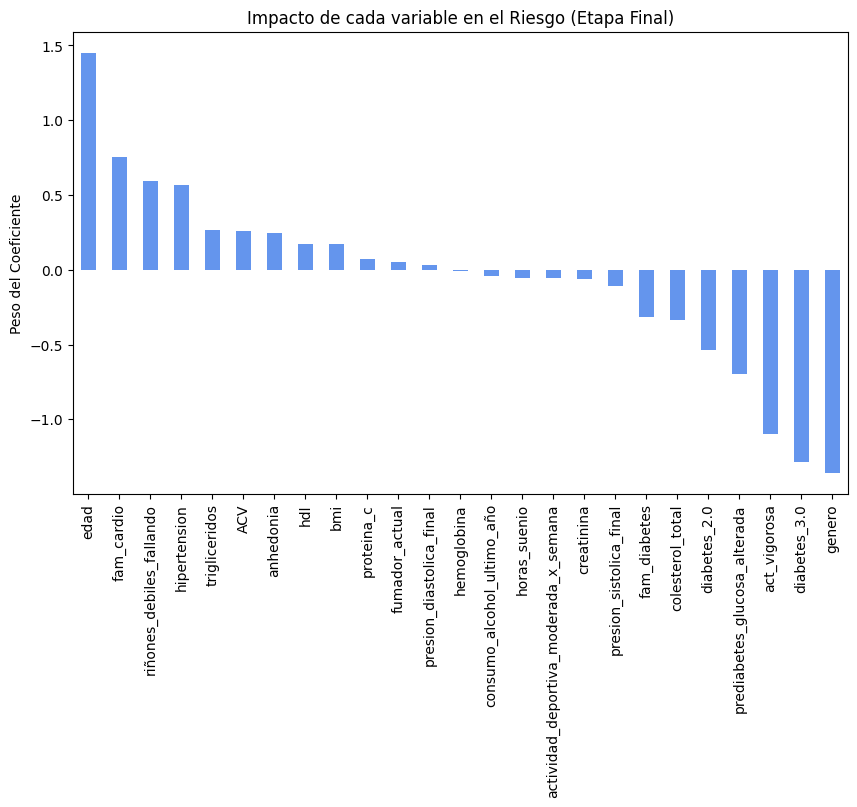

In [361]:
# Ver coeficientes de la Etapa 1 (solo consulta)
# Tomamos el primer modelo entrenado en el bucle (i=0)
importances_lr = pd.Series(modelo_etapa_lr.coef_[0], index=etapas[i]).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances_lr.plot(kind='bar', color='cornflowerblue')
plt.title('Impacto de cada variable en el Riesgo (Etapa Final)')
plt.ylabel('Peso del Coeficiente')
plt.show()